### 1. Camera Calibration

In [3]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt

In [4]:
CAL_IMAGE_PATH = '../camera_cal/calibration*.jpg'
CAL_IMAGE_SIZE = (720, 1280, 3)
KERNEL = (9, 6)

In [40]:
os.path.join('camera_cal','*.jpg')

'camera_cal/*.jpg'

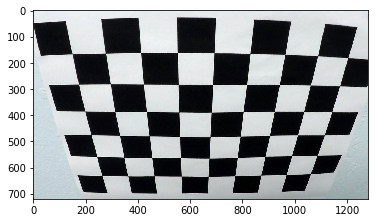

In [5]:
# Make a list of calibration images
fname = 'camera_cal/calibration2.jpg'
img = cv2.imread(fname)
plt.imshow(img)
plt.show()

In [21]:
def camera_calib(path_to_images, kernel):
    """
    Calculate camera calibration based on the chessboard images provided
    """
    objpoints = []
    imgpoints = []
    
    nx = kernel[0]
    ny = kernel[1]
    
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)  # [0:ny, 0:nx] ?
    
    images = glob(path_to_images)
    np.zeros((len(images), *CAL_IMAGE_SIZE), dtype=np.uint8)
    
    successful_cnt = 0
    for idx, fname in enumerate(images):
        imag = cv2.imread(fname)
        if img.shape[0] != CAL_IMAGE_SIZE[1] or img.shape[1] != CAL_IMAGE_SIZE[0]:
            img = imresize(img, CAL_IMAGE_SIZE)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            
            img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.title(fname)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, 
                                                       imgpoints, 
                                                       CAL_IMAGE_SIZE[:-1],  # ::-1 ?
                                                       None, 
                                                       None)

    calibration = {'objpoints': objpoints,
                   'imgpoints': imgpoints,
                   'cal_images': cal_images,
                   'mtx': mtx,
                   'dist': dist,
                   'rvecs': rvecs,
                   'tvecs': tvecs}

    return calibration

def getCalPoints(pathToImages, kernel=(9, 6)):

    objpoints = []
    imgpoints = []
    
    nx = kernel[0]
    ny = kernel[1]

    objp       = np.zeros((nx * ny, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

    images = glob.glob(pathToImages + '*.jpg')

    for idx, fname in enumerate(images):
        image = cv2.imread(fname)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
            img = cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.title(fname)
            plt.imshow(img);
            plt.axis('off')
            plt.show()
    
    return objpoints, imgpoints, gray.shape

In [30]:
from tqdm import tqdm
from scipy.misc import imresize, imread

calculate_camera_calibration(CAL_IMAGE_PATH, ROWS, COLS)

Processing image: 100%|██████████| 20/20 [00:08<00:00,  2.52it/s]


17/20 camera calibration images processed.


{'cal_images': array([[[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ..., 
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ..., 
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ..., 
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         ..., 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ..., 
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ..., 
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [ 

In [28]:
ROWS = 6
COLS = 9
CAL_IMAGE_SIZE = (720, 1280, 3)
CALC_CAL_POINTS = False
CAL_IMAGE_PATH = 'camera_cal/calibration*.jpg'
CALIBRATION_PATH = 'camera_cal/calibration.p'
def calculate_camera_calibration(path_pattern, rows, cols):
    """
    Calculates the camera calibration based on chessboard images.
    :param path_pattern:
    :param rows: number of rows on chessboard
    :param cols: number of columns on chessboard
    :return:
    """
    objp = np.zeros((rows * cols, 3), np.float32)
    objp[:, :2] = np.mgrid[0:cols, 0:rows].T.reshape(-1, 2)

    objpoints = []
    imgpoints = []

    images = glob(path_pattern)
    cal_images = np.zeros((len(images), *CAL_IMAGE_SIZE), dtype=np.uint8)

    successfull_cnt = 0
    for idx, fname in enumerate(tqdm(images, desc='Processing image')):
        img = imread(fname)
        if img.shape[0] != CAL_IMAGE_SIZE[0] or img.shape[1] != CAL_IMAGE_SIZE[1]:
            img = imresize(img, CAL_IMAGE_SIZE)

        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (cols, rows), None)

        if ret:
            successfull_cnt += 1

            objpoints.append(objp)
            imgpoints.append(corners)

            img = cv2.drawChessboardCorners(img, (cols, rows), corners, ret)
            cal_images[idx] = img

    print("%s/%s camera calibration images processed." % (successfull_cnt, len(images)))

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, CAL_IMAGE_SIZE[:-1], None, None)

    calibration = {'objpoints': objpoints,
                   'imgpoints': imgpoints,
                   'cal_images': cal_images,
                   'mtx': mtx,
                   'dist': dist,
                   'rvecs': rvecs,
                   'tvecs': tvecs}

    return calibration

In [33]:
def get_camera_calibration():
    """
    Depending on the constant CALC_CAL_POINTS the camera calibration will be
    calculated and stored on disk or loaded.
    """
    if CALC_CAL_POINTS:
        calibration = calculate_camera_calibration(CAL_IMAGE_PATH, ROWS, COLS)
        with open(CALIBRATION_PATH, 'wb') as f:
            pickle.dump(calibration, file=f)
    else:
        with open(CALIBRATION_PATH, "rb") as f:
            calibration = pickle.load(f)

    return calibration

class CameraCalibrator:
    def __init__(self, image_shape, calibration):
        """
        Helper class to remove lens distortion from images
        :param image_shape: with and height of the image
        :param calibration: calibration object which can be retrieved from "get_camera_calibration()"
        """
        self.objpoints = calibration['objpoints']
        self.imgpoints = calibration['imgpoints']
        self.image_shape = image_shape

        self.ret, self.mtx, self.dist, self.rvecs, self.tvecs = \
            cv2.calibrateCamera(self.objpoints, self.imgpoints, image_shape, None, None)

    def undistort(self, img):
        return cv2.undistort(img, self.mtx, self.dist, None, self.mtx)

In [34]:
calculate_camera_calibration(CAL_IMAGE_PATH, ROWS, COLS)

Processing image: 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]


17/20 camera calibration images processed.


TypeError: get_camera_calibration() takes 0 positional arguments but 1 was given

In [81]:
# Get calibratio coeficients of camera
def getCalibration(pathToImages, kernel=(9, 6), plot=0):

    objpoints = []
    imgpoints = []
    
    nx = kernel[0]
    ny = kernel[1]

    objp       = np.zeros((nx * ny, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

    images = glob(pathToImages + '*.jpg')

    for idx, fname in enumerate(images):
        image = cv2.imread(fname)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
            img = cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
            if plot:
                f, (p1) = plt.subplots(1,1, figsize=(5,5))
                p1.set_title('Original: ' + fname)
                p1.imshow(img)
                p1.axis('off')
                plt.show()
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera( objpoints, 
                                                        imgpoints, 
                                                        gray.shape[::-1], 
                                                        None, 
                                                        None)
    
    return mtx, dist

In [82]:
def get_calibration(path_to_images, kernel=(9,6), plot=0):
    """Returns camera calibration matrix using
    chessboard images in given glob path
    assuming 6x9 or 5x9 chess corners
    """
    object_points = []  # 3d point in real world space
    img_points = []  # 2d points in image plane.

    images = glob(path)
    total_image_count = len(images)

    image_count = 1
    fig = plt.figure()
    for filename in images:
        img = cv2.imread(filename)
        nx, ny = 6, 9
        retval, corners = cv2.findChessboardCorners(img, (nx, ny))
        objp = np.zeros((nx * ny, 3), np.float32)
        objp[:, :2] = np.mgrid[0: nx, 0: ny].T.reshape(-1, 2)
        
        if not retval:
            nx, ny = 5, 9 # Trying with 5 rows
            objp = np.zeros((nx * ny, 3), np.float32)
            objp[:, :2] = np.mgrid[0: nx, 0: ny].T.reshape(-1, 2)
            retval, corners = cv2.findChessboardCorners(img, (nx, ny))
        
        if retval:
            object_points.append(objp)
            img_points.append(corners)

            ax = fig.add_subplot(math.ceil(total_image_count / 2), 2, image_count)
            chessboard_with_corners = cv2.drawChessboardCorners(img, (nx, ny), corners, retval)
            chessboard_with_corners = cv2.cvtColor(chessboard_with_corners, cv2.COLOR_BGR2RGB)
            ax.imshow(chessboard_with_corners)
            ax.axis('off')
            image_count += 1

    return cv2.calibrateCamera(object_points, img_points, img.shape[0:2], None, None), fig

In [83]:
import os
images = glob('camera_cal/calibration*.jpg')

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

for ny in [5,6]:
    for nx in [6,7,8,9]:

        # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
        objp = np.zeros((ny*nx,3), np.float32)
        objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)


        # Step through the list and search for chessboard corners
        for idx, fname in enumerate(images):
            img = cv2.imread(fname)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

            # If found, add object points, image points
            if ret == True:
                objpoints.append(objp)
                imgpoints.append(corners)


                # Draw and display the corners
                cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
                image_name=os.path.split(fname)[1]
                #write_name = out_dir+'corners_found_ny'+str(ny)+'_nx'+str(nx)+'_'+image_name
                #cv2.imwrite(write_name, img)
                print(fname)
                cv2.imshow('img', img)
                cv2.waitKey(500)
   # cv2.destroyAllWindows()

TypeError: 'module' object is not callable

In [84]:
CAL_IMAGE_SIZE[:-1]

(720, 1280)

In [85]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

CAL_IMAGE_PATH ='../camera_cal/calibration*.jpg'
CAL_IMAGE_SIZE = (720, 1280, 3)

def get_calibration(path_to_images, nx, ny):  #9, 6
    """Returns camera calibration matrix using
    chessboard images in given glob path
    assuming 6x9 or 5x9 chess corners
    """
    obj_points = []  # 3d point in real world space
    img_points = []  # 2d points in image plane.

    images = glob.glob(path_to_images)
    cal_images = np.zeros((len(images), *CAL_IMAGE_SIZE), dtype=np.uint8)
    total_image_count = len(images)

    image_count = 1
    fig = plt.figure()
    for idx, fname in images:
        img = cv2.imread(fname)
        if img.shape[0] != CAL_IMAGE_SIZE[0] or img.shape[1] != CAL_IMAGE_SIZE[1]:
            img = imresize(img, CAL_IMAGE_SIZE)

        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        objp = np.zeros((rows * cols, 3), np.float32)
        objp[:, :2] = np.mgrid[0:cols, 0:rows].T.reshape(-1, 2)

        if ret:
            obj_points.append(objp)
            img_points.append(corners)

            ax = fig.add_subplot(math.ceil(total_image_count / 2), 2, image_count)
            img = cv2.drawChessboardCorners(img, (nx, ny), corners, retval)
            ax.imshow(img)
            ax.axis('off')
            cal_images[idx] = img

            image_count += 1

    print("%s/%s camera calibration images processed." % (image_count, len(images)))

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, CAL_IMAGE_SIZE[:-1], None, None)
    calibration = {'obj_points': obj_points,
                   'img_points': img_points,
                   'cal_images': cal_images,
                   'mtx': mtx,
                   'dist': dist,
                   'rvecs': rvecs,
                   'tvecs': tvecs}
    return calibration, fig

In [86]:
#mtx, dist = get_calibration('camera_cal/calibration', (9, 6), 0);
get_calibration(CAL_IMAGE_PATH,9, 6)

1/0 camera calibration images processed.


error: /Users/jenkins/miniconda/1/x64/conda-bld/conda_1486587097465/work/opencv-3.1.0/modules/calib3d/src/calibration.cpp:3314: error: (-215) nimages > 0 in function calibrateCamera


In [79]:

# Plot undistorted images with calibration data
def plotUndistorted(pathToImages, mtx, dist):
    
    images = glob(pathToImages + '*.jpg')
    nimgs = len(images)

    for idx, fname in enumerate(images):
        
        f, (p1, p2) = plt.subplots(1,2, figsize=(10,5))
    
        image = cv2.imread(fname)
        undist = cv2.undistort(image, mtx, dist, None, mtx)
        undist = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        p1.set_title('Original: ' + fname)
        p1.imshow(image)
        p1.axis('off')
        p2.set_title('Undistorted: ' + fname)
        p2.imshow(undist)
        p2.axis('off')
    
        plt.show()

In [80]:
plotUndistorted('camera_cal/calibration', mtx, dist)


TypeError: 'module' object is not callable

In [77]:
# Extract grids in images, to visualize quality of calibration
def getGridAreas(pathToImages, mtx, dist, kernel=(9, 6)):
    
    nx = kernel[0]
    ny = kernel[1]

    images = glob(pathToImages + '*.jpg')

    for idx, fname in enumerate(images):
        image = cv2.imread(fname)
        undist = cv2.undistort(image, mtx, dist, None, mtx)
        gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        if ret == True:
            # Draw and display the corners
            cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
            offset = 20
            img_size = (gray.shape[1], gray.shape[0])
            src = np.float32([corners[0], 
                              corners[nx-1], 
                              corners[-1], 
                              corners[-nx]])
            dst = np.float32([[offset, offset], 
                              [img_size[0]-offset, offset], 
                              [img_size[0]-offset, img_size[1]-offset], 
                              [offset, img_size[1]-offset]])
            M = cv2.getPerspectiveTransform(src, dst)
            warped = cv2.warpPerspective(undist, M, img_size)

            f, (p1, p2) = plt.subplots(1,2, figsize=(10,5))
            f.tight_layout() 

            image = cv2.imread(fname)
            undist = cv2.undistort(image, mtx, dist, None, mtx)
            undist = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            p1.set_title('Original: ' + fname)
            p1.imshow(image)
            p1.axis('off')
            p2.set_title('Grid: ' + fname)
            p2.imshow(warped)
            p2.axis('off')

            plt.show()

In [78]:
getGridAreas('camera_cal/calibration', mtx, dist, (9,6))


TypeError: 'module' object is not callable

In [18]:
# Define all used color spaces
def colorSpace(image, color):
    if color == 'bgr_r':
        return image[:,:,2]
    if color == 'bgr_g':
        return image[:,:,1]
    if color == 'bgr_b':
        return image[:,:,0]
    if color == 'hls_s':
        hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
        return hls[:,:,2]
    if color == 'hls_l':
        hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
        return hls[:,:,1]
    if color == 'yuv_y':
        yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        return yuv[:,:,0]
    if color == 'gray':
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if color == 'lab_b':
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
        return lab[:,:,2]
    if color == 'yuv_u':
        yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        return yuv[:,:,1]
    if color == 'hls_h':
        hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
        return hls[:,:,0]
    return None


In [19]:
# Combine sobel stuff in a single functio
def sobel_detect(img, sobel_kernel=3, dir_thresh=(0, np.pi/2, np.pi/6), abs_thresh=(10, 255), mag_thresh=(0, 255)):
    
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    mag_sobel_manhattan = np.uint8( 255 * ( np.abs(sobelx) + np.abs(sobely) ) / np.max( np.abs(sobelx) + np.abs(sobely) ) )
    mag_sobel_euclidean = np.uint8( 255 * np.sqrt(sobelx**2 + sobely**2)/np.max(np.sqrt(sobelx**2 + sobely**2))) 
    
    binary_output = np.zeros_like(absgraddir)
    
    # Do note that we compare angles
    # Then magnitude of sobel vector as euclidean
    # Then magnitude of sobel vector as manhattan
    binary_output[ ( ( (absgraddir >= dir_thresh[0] - dir_thresh[2]) & (absgraddir <= dir_thresh[0] + dir_thresh[2]) ) |
                     ( (absgraddir >= dir_thresh[1] - dir_thresh[2]) & (absgraddir <= dir_thresh[1] + dir_thresh[2]) ) ) & 
                     ( (mag_sobel_euclidean >= mag_thresh[0]) & (mag_sobel_euclidean <= mag_thresh[1]) ) & 
                     ( (mag_sobel_manhattan >= abs_thresh[0]) & (mag_sobel_manhattan <= abs_thresh[1]) ) ] = 1
    
    return binary_output

In [20]:

# Select range of image data
def range_select(img, thresh=(0, 255)):
    
    binary_output = np.zeros_like(img)
    binary_output[(img >= thresh[0]) & (img <= thresh[1])] = 1
    
    return binary_output

In [21]:
def normalize_channel(image_data):
    image_data = np.array(image_data)
    x_min = (image_data.min())
    x_max = (image_data.max())
    a     = 0
    b     = 255
    return np.uint8( a + ( b - a ) * np.true_divide( ( image_data - x_min ),  ( x_max - x_min ) ) )

In [22]:
# Mild preprocessing of images, for now just normalization
def preprocess_image(image):
    img   = cv2.cvtColor(image, cv2.COLOR_BGR2YUV);
    a,b,c = cv2.split(img)
    # I hand tuned these myself
    #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
    #a     = clahe.apply(a)
    #b     = 127 * np.ones_like(b)
    #a     = normalize_channel(a)
    #abc   = cv2.merge((a,b,c))
    #rgb   = cv2.cvtColor(abc, cv2.COLOR_YUV2BGR);
    # normalize channels then
    a = equ = cv2.equalizeHist(a)
    abc   = cv2.merge((a,b,c))
    rgb   = cv2.cvtColor(abc, cv2.COLOR_YUV2BGR);
    
    rgb[:,:,0] = normalize_channel(rgb[:,:,0])
    rgb[:,:,1] = normalize_channel(rgb[:,:,1])
    rgb[:,:,2] = normalize_channel(rgb[:,:,2])
    return rgb

In [23]:
# defines the pipeline that extracts lane points from camera
def pipeline(img, plot_masks=0):
    
    # undistort image
    image = cv2.undistort(img, mtx, dist, None, mtx)
    #image = preprocess_image(image)
    
    combined = np.zeros_like(image[:,:,0])
    
    rangedr = (range_select(colorSpace(image, 'bgr_r'), thresh=(100, 255)))
    sobelr  = (sobel_detect(colorSpace(image, 'bgr_r'), sobel_kernel=5, dir_thresh=(0.78,2.35,np.pi/6), abs_thresh=(70,255), mag_thresh=(80,255)))
    
    rangeds = (range_select(colorSpace(image, 'hls_s'), thresh=(70, 255)))
    sobels  = (sobel_detect(colorSpace(image, 'hls_s'), sobel_kernel=5, dir_thresh=(0.78,2.35,np.pi/6), abs_thresh=(50,255), mag_thresh=(50,255)))   
    
    rangedur = (range_select(colorSpace(image, 'bgr_r'), thresh=(220, 255)))
    sobelur  = (sobel_detect(colorSpace(image, 'bgr_r'), sobel_kernel=5, dir_thresh=(0.78,2.35,np.pi/5), abs_thresh=(5,255), mag_thresh=(5,255)))
    
    combined = np.zeros_like(image[:,:,0])
    combined[ ((rangedur >= 1) & (sobelur >= 1)) | ((rangedr >= 1) & (sobelr >= 1)) | ((rangeds >= 1) & (sobels >= 1)) ] = 1
    
    # prune all points not red or green enough (includes yellow and white)
    filterr = (range_select(colorSpace(image, 'bgr_r'), thresh=(100, 255)))
    filterg = (range_select(colorSpace(image, 'bgr_g'), thresh=(100, 255)))
    combined[ (filterr == 0) | (filterg == 0) ] = 0 
    
    if plot_masks:
        maskr = np.zeros_like(image[:,:,0])
        maskr[((rangedr >= 1) & (sobelr >= 1))] = 1
        masks = np.zeros_like(image[:,:,0])
        masks[((rangeds >= 1) & (sobels >= 1))] = 1
        maskur = np.zeros_like(image[:,:,0])
        maskur[((rangedur >= 1) & (sobelur >= 1))] = 1
        maskf = np.zeros_like(image[:,:,0])
        maskf[((filterr >= 1) & (filterg >= 1))] = 1
    
        f, (p1, p2, p3, p4, p5, p6) = plt.subplots(1,6, figsize=(16,4))
        f.tight_layout() 
        p1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        p2.imshow(maskr, cmap = 'gray')
        p3.imshow(masks, cmap = 'gray')
        p4.imshow(maskur, cmap = 'gray')
        p5.imshow(maskf, cmap = 'gray')
        p6.imshow(combined, cmap = 'gray')
        p1.axis('off')
        p2.axis('off')
        p3.axis('off')
        p4.axis('off')
        p5.axis('off')
        p6.axis('off')
        plt.show()

    return combined

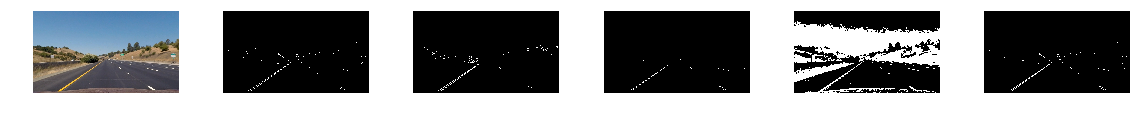

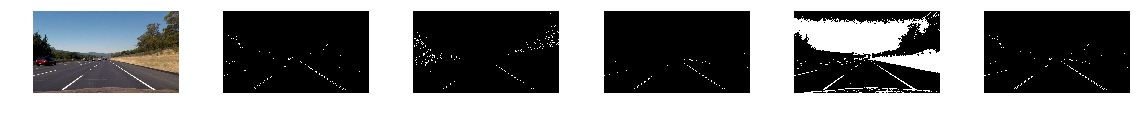

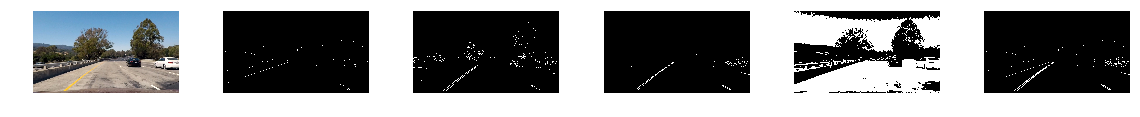

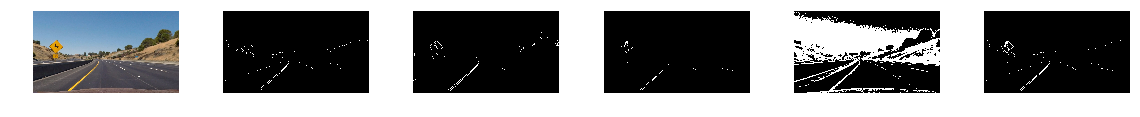

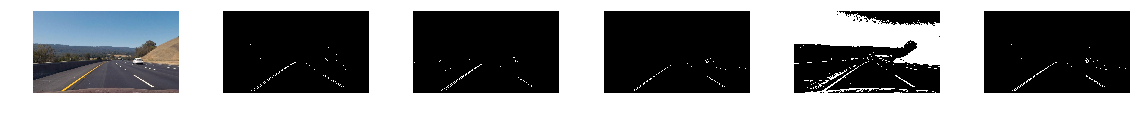

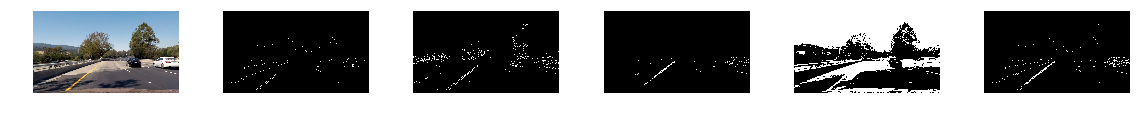

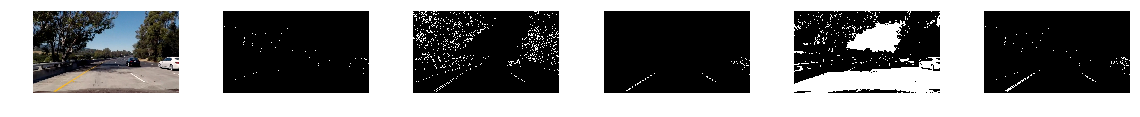

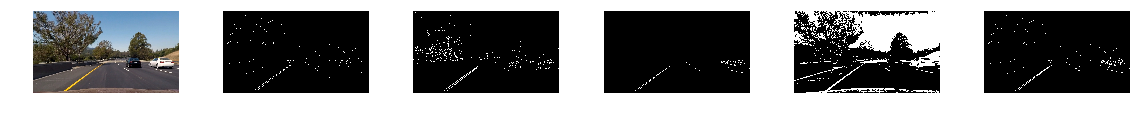

In [25]:
# Show pipeline behavior for images in test set
def appyPipeline(pathToImages, pipeline):

    images = glob(pathToImages + '*.jpg')

    for idx, fname in enumerate(images):
        image = cv2.imread(fname)
        procimg = pipeline(image, 1)
        
appyPipeline('test_images/', pipeline)

In [26]:
# warp the image, also return M and Minv for later use
def transform(image, erode=1):
    
    img_size = (image.shape[1], image.shape[0])
    offset = 300
    
    # I ontained these by empirical trials
    tolerance = 0.04
    
    src = np.float32([[img_size[0] * ( 0.5 - tolerance ), img_size[1] * 0.625], 
                      [img_size[0] * ( 0.5 + tolerance ), img_size[1] * 0.625], 
                      [img_size[0] * 0.9,  img_size[1]], 
                      [img_size[0] * 0.1,  img_size[1]]])
    
    dst = np.float32([[offset, 0], 
                      [img_size[0] - offset, 0], 
                      [img_size[0] - offset, img_size[1]], 
                      [offset, img_size[1]]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src) 
                       
    warped = cv2.warpPerspective(image, M, img_size)
    
    # erosion helps filtering noise
    # We also work inside a smaller image to icnrease processing speed
    if erode:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
        erosion = cv2.erode(warped,kernel,iterations = 1)
        dilation = cv2.dilate(erosion, kernel, iterations = 1)
        resized = cv2.resize(dilation, (0,0), fx=1/4, fy=8/4, interpolation=cv2.INTER_AREA )  
    else:
        resized = cv2.resize(warped, (0,0), fx=1/4, fy=8/4, interpolation=cv2.INTER_AREA )  
    
    saturated = np.zeros_like(resized)
    saturated[resized > 0] = 1
                           
    return saturated, M, Minv

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# Obtain clusters of pixels in image section and return them
# along with how many points were classified into clusters, this
# helps abstract the points of the lane markers

def clusterizeSection(img, pxradius=20):
    idxy, idxx = np.nonzero(img)
    conv = [ [idxx[j], idxy[j]] for j in range(len(idxy)) ]
    
    means = []
    weights = []
    
    if (len(conv)) > 0:
        X = np.array(conv) #StandardScaler().fit_transform(conv)
        db = DBSCAN(eps=pxradius, min_samples=10).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        unique_labels = set(labels)
        
        for k in unique_labels:
            class_member_mask = (labels == k)
            #xy = X[class_member_mask & core_samples_mask]
            xy = X[class_member_mask]
            if len(xy) > 0:
                means.append(xy.mean(axis=0))
                weights.append(len(xy))
            else:
                n_clusters_ = n_clusters_ - 1
            
        if (n_clusters_ > 0) and (len(means) > 0):
            return n_clusters_, means, weights
        
    return 0, None, None

In [28]:
# slides through the image getting the points of the lane markers for 
# easier fitting (ie, instead of using the image, use a few points of it)

def getPointBlobs(warped, slices=10, pxradius=20, scalef=1):
    all_means = []
    all_weights = []
        
    for i in range(slices * 2 - 1):
        step = warped.shape[0]//slices
        end = warped.shape[0] - i * (step//2)
        start = end - step

        section = warped[start:end,:]
        histogram = np.sum(section[:,:], axis=0)
        
        n_clusters, means, weights = clusterizeSection(section, pxradius)
        
        if n_clusters > 0:
            traslated_means = []
            for mean in means:
                traslated_means.append([scalef * mean[0], scalef * ( warped.shape[0] - ( start  + mean[1] ))])
            all_means.append(traslated_means)
            all_weights.append(weights)

    return all_means, all_weights

In [34]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import imresize, imread

CAL_IMAGE_PATH ='camera_cal/calibration*.jpg'
CAL_IMAGE_SIZE = (720, 1280, 3)

def get_calibration_matrix(path):
    """Returns camera calibration matrix using
    chessboard images in given glob path
    assuming 6x9 or 5x9 chess corners
    """
    object_points = []  # 3d point in real world space
    img_points = []  # 2d points in image plane.

    images = glob.glob(path)
    total_image_count = len(images)

    image_count = 1
    fig = plt.figure()
    for filename in images:
        img = cv2.imread(filename)
        nx, ny = 6, 9
        retval, corners = cv2.findChessboardCorners(img, (nx, ny))
        objp = np.zeros((nx * ny, 3), np.float32)
        objp[:, :2] = np.mgrid[0: nx, 0: ny].T.reshape(-1, 2)
        
        if img.shape[0] != CAL_IMAGE_SIZE[0] or img.shape[1] != CAL_IMAGE_SIZE[1]:
            img = imresize(img, CAL_IMAGE_SIZE)
        if not retval:
            nx, ny = 5, 9 # Trying with 5 rows
            objp = np.zeros((nx * ny, 3), np.float32)
            objp[:, :2] = np.mgrid[0: nx, 0: ny].T.reshape(-1, 2)
            retval, corners = cv2.findChessboardCorners(img, (nx, ny))
        
        if retval:
            object_points.append(objp)
            img_points.append(corners)

            ax = fig.add_subplot(math.ceil(total_image_count / 2), 2, image_count)
            chessboard_with_corners = cv2.drawChessboardCorners(img, (nx, ny), corners, retval)
            chessboard_with_corners = cv2.cvtColor(chessboard_with_corners, cv2.COLOR_BGR2RGB)
            ax.imshow(chessboard_with_corners)
            ax.axis('off')
            plt.title(filename)
            image_count += 1
    print("%s/%s camera calibration images processed." % (image_count, len(images)))
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, img_points, CAL_IMAGE_SIZE[:-1], None, None)
    calibration = {'obj_points': object_points,
                   'img_points': img_points,
                   #'cal_images': cal_images,
                   'mtx': mtx,
                   'dist': dist,
                   'rvecs': rvecs,
                   'tvecs': tvecs}
    #fig.set_size_inches(10,30)
    return calibration, fig


    #return cv2.calibrateCamera(object_points, img_points, img.shape[0:2], None, None), fig


def undistort(img, cameraMatrix, distCoeffs):
    """Returns undistorted image using given
    object points and image points
    """
    return cv2.undistort(img, cameraMatrix, distCoeffs)

19/20 camera calibration images processed.


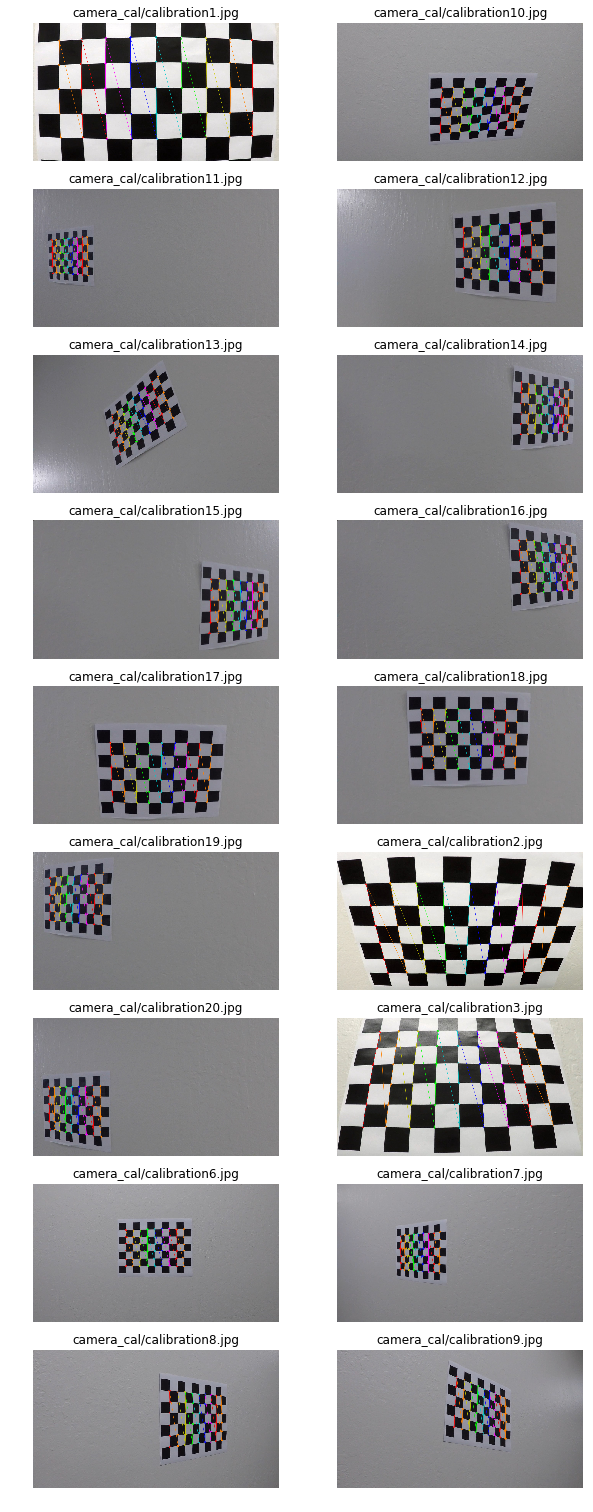

In [35]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
#(ret, cameraMat, distCoeffs, rvecs, tvecs), fig = 
calibration, fig = get_calibration_matrix(CAL_IMAGE_PATH)
fig.set_size_inches(10,30)


In [42]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import imresize, imread

CAL_IMAGE_PATH ='camera_cal/calibration*.jpg'
CAL_IMAGE_SIZE = (720, 1280, 3)

def get_calibration(path_to_images):  #9, 6
    """Returns camera calibration matrix using
    chessboard images in given glob path
    assuming 6x9 or 5x9 chess corners
    """
    obj_points = []  # 3d point in real world space
    img_points = []  # 2d points in image plane.

    images = glob.glob(path_to_images)
    #cal_images = np.zeros((len(images), *CAL_IMAGE_SIZE), dtype=np.uint8)
    total_immg_count = len(images)

    img_count = 1
    fig = plt.figure()
    for fname in images:
        img = cv2.imread(fname)
        nx, ny = 6, 9
        # resize image if it's different shape than (720, 1280, 3)
        if img.shape[0] != CAL_IMAGE_SIZE[0] or img.shape[1] != CAL_IMAGE_SIZE[1]:
            img = imresize(img, CAL_IMAGE_SIZE)

        #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2.findChessboardCorners(img, (nx, ny), None) #None?

        objp = np.zeros((nx * ny, 3), np.float32)
        objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

        # include special case of cheesboard image with 5x9
        if not ret:
            nx, ny = 5,9
            objp = np.zeros((nx * ny, 3), np.float32)
            objp[:, :2] = np.mgrid[0: nx, 0: ny].T.reshape(-1, 2)
            ret, corners = cv2.findChessboardCorners(img, (nx, ny))

        if ret:
            obj_points.append(objp)
            img_points.append(corners)

            ax = fig.add_subplot(math.ceil(total_img_count / 2), 2, img_count)
            img_w_corners = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            img_w_corners = cv2.cvtColor(img_w_corners, cv2.COLOR_BGR2RGB)
            plt.title(fname)
            ax.imshow(img)
            ax.axis('off')
            #cal_images[idx] = img

            imag_count += 1

    print("%s/%s camera calibration images processed." % (img_count, len(images)))

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, CAL_IMAGE_SIZE[:-1], None, None)
    calibration = {'obj_points': obj_points,
                   'img_points': img_points,
                   #'cal_images': cal_images,
                   'mtx': mtx,
                   'dist': dist,
                   'rvecs': rvecs,
                   'tvecs': tvecs}
    return calibration, fig

In [48]:
import cv2
import os
import matplotlib.pyplot as plt
import CameraCalibration
%matplotlib inline
#(ret, cameraMat, distCoeffs, rvecs, tvecs), fig = 
calibration, fig = CameraCalibration.get_calibration(CAL_IMAGE_PATH)
fig.set_size_inches(10,30)

NameError: name 'total_img_count' is not defined